In [1]:
import VASPPlotter
import VASPInputHandler
import numpy as np

['/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/NaCrTiO4_pnma_second', '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/Na0.5CrTiO4_pnma_second', '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/CrTiO4_pnma_second', '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/Mg0.5CrTiO4_pnma_second', '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/MgCrTiO4_pnma_second']
0.0 3.2238 -3.2238
0.0 2.456 -2.456
0.0 1.7058 -1.7058
0.0 3.1296 -3.1296
0.0 6.707 -6.707


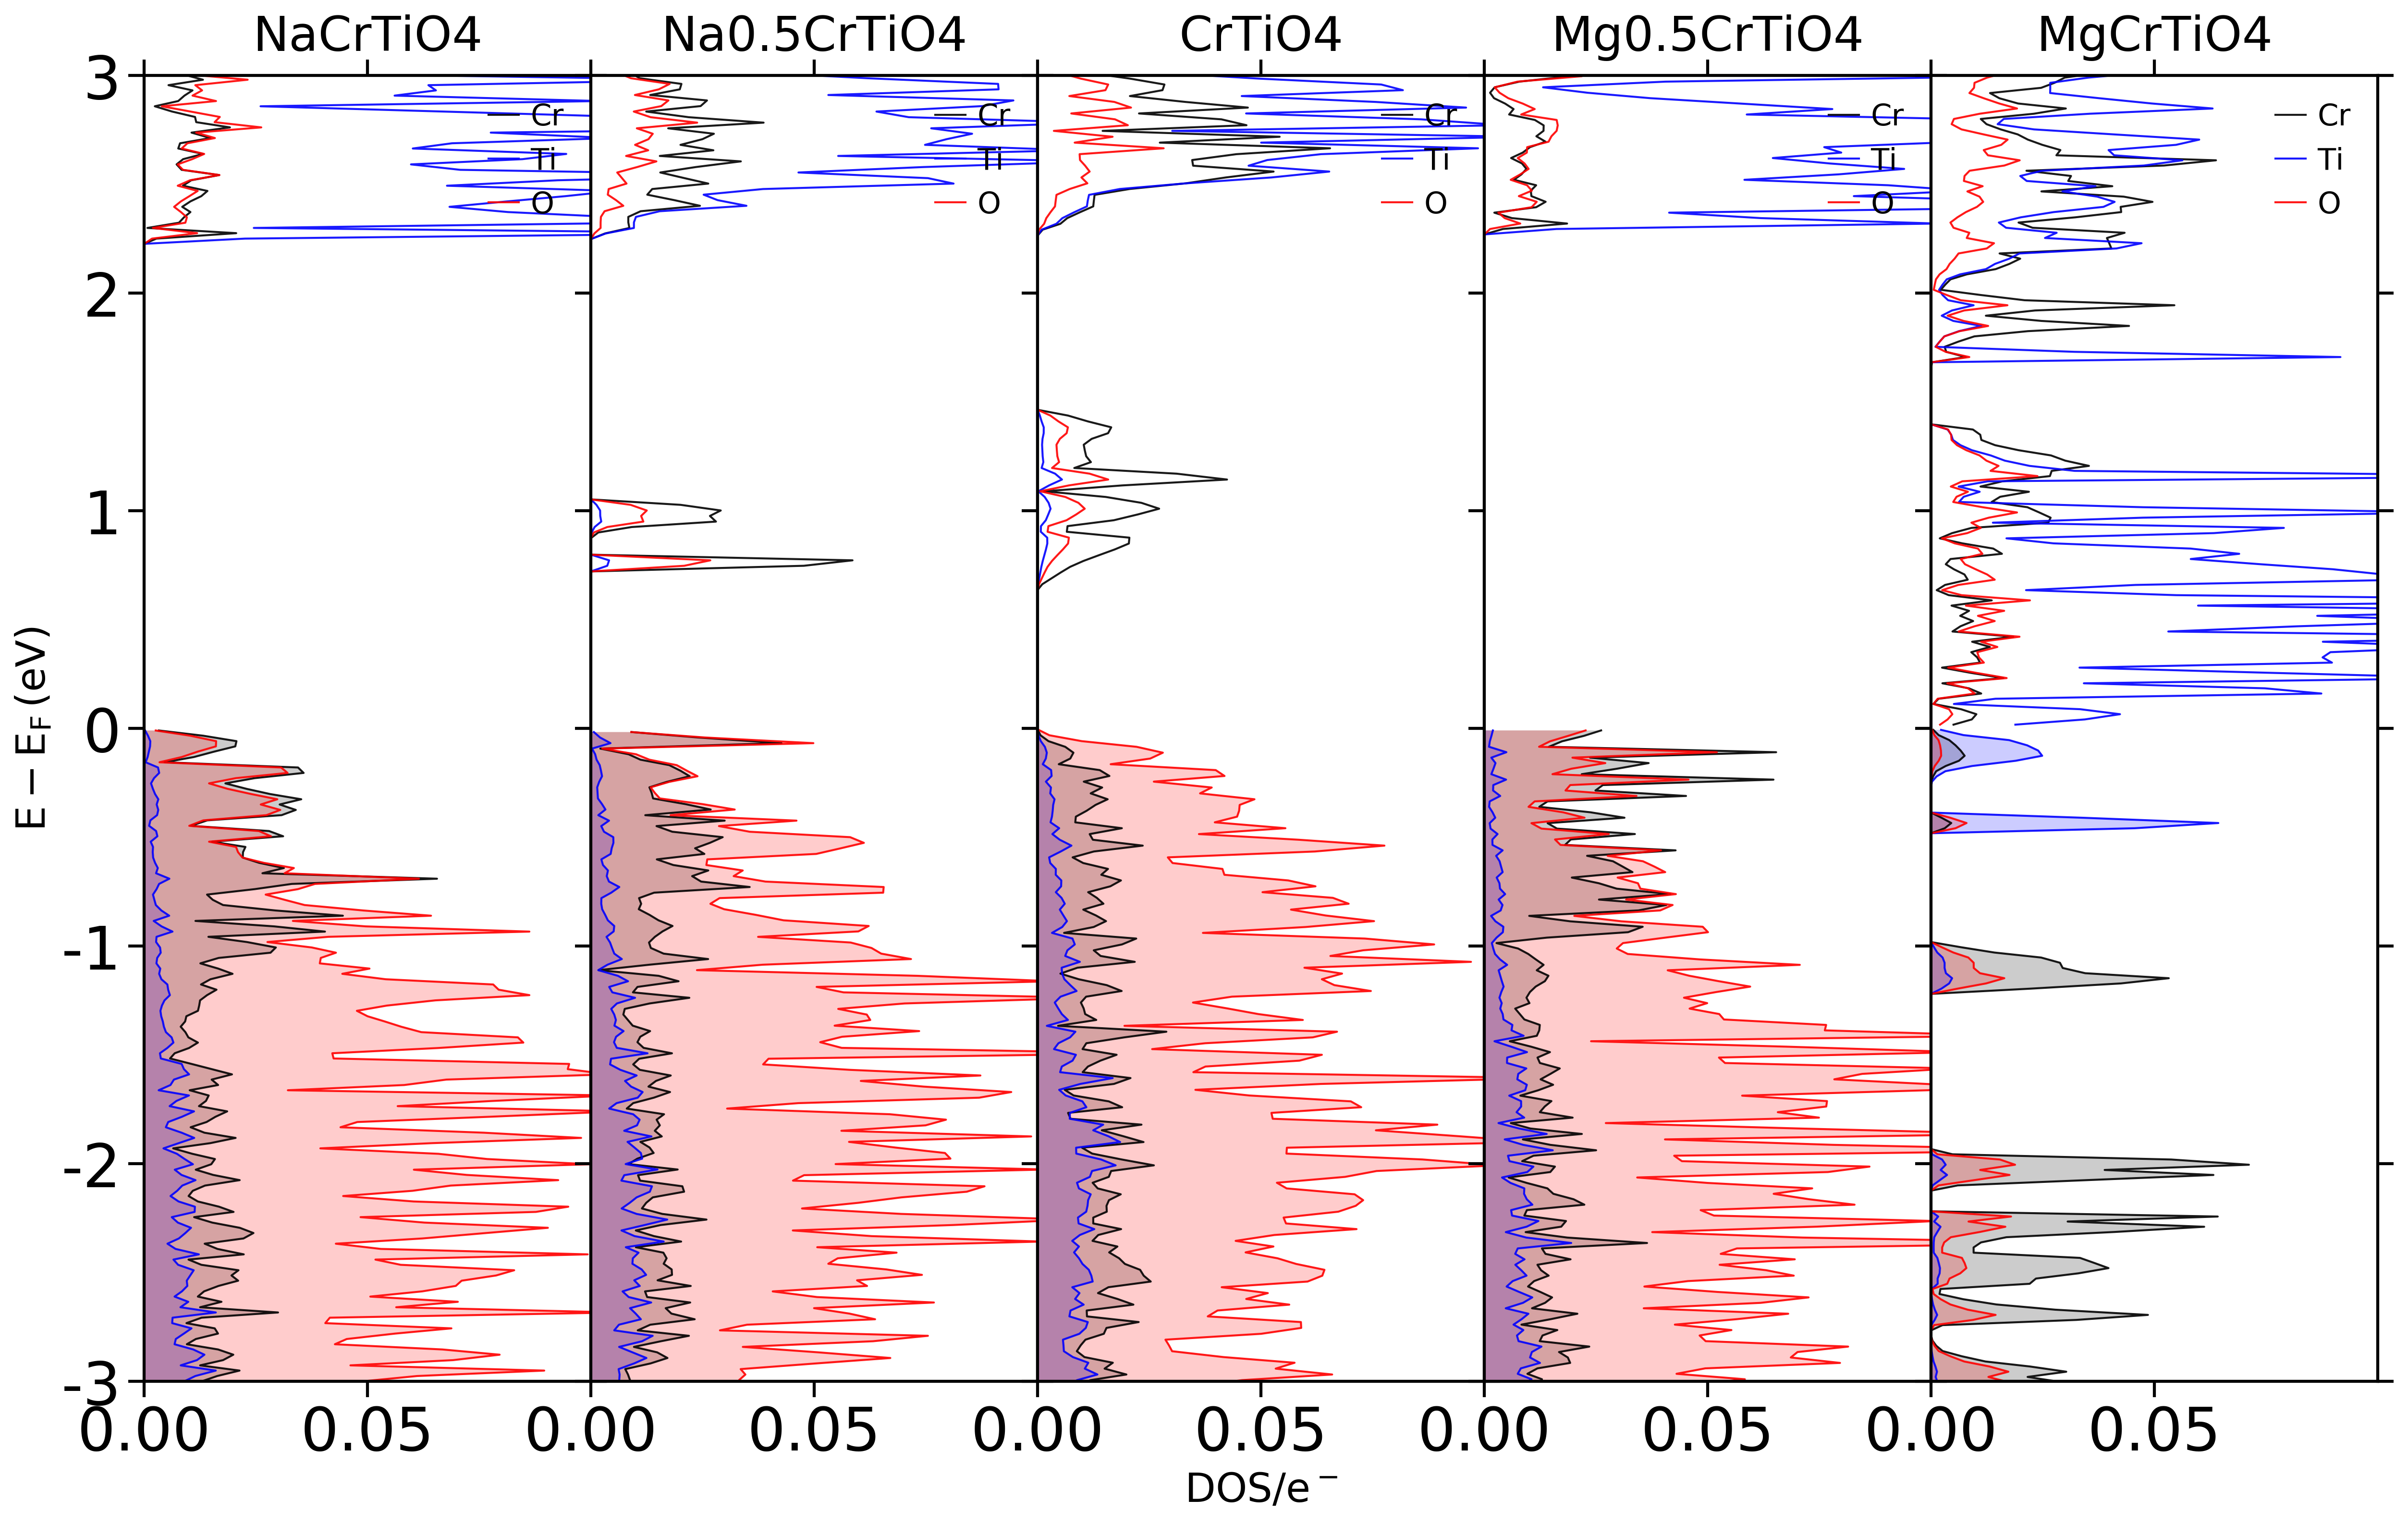

Text(0.5, 1.01, 'MgCrTiO4')

In [4]:
# DOS Plot for Full Na to Full Mg.
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4")
a.dos(what_to_plot={'Cr' : {'spins' : ['summed'], 'orbitals' : ['all']}, 'Ti' :
                    
                    {'spins' : ['summed'], 'orbitals' : ['all']}, 'O' : {'spins' : ['summed'], 'orbitals' : ['all']}},
      colors_and_labels = {'Cr-summed-all' : {'color' : 'black', 'label' : 'Cr'}, 'Ti-summed-all' : {'color' : 'blue', 'label' : 'Ti'}, 'O-summed-all' : {'color' : 'red', 'label' : 'O'}},
      xticks=(True, np.arange(0, 0.100, 0.05)), yticks=(True, np.arange(-3, 3.01, 1)), doscar="DOSCAR", xlim=(0, 0.1), ylim=(-3, 3), smearing = 0.1, show = True, spgp='pnma')

2.4778112499999994
4.096118749999995
2.454997500000002
4.251351249999999
2.2282431249999997
3.4668287499999977
2.0939887499999985
3.7485299999999953
calcuation is not converged
2.370547499999998
3.778914999999998
2.7864818750000007
3.4608374999999967


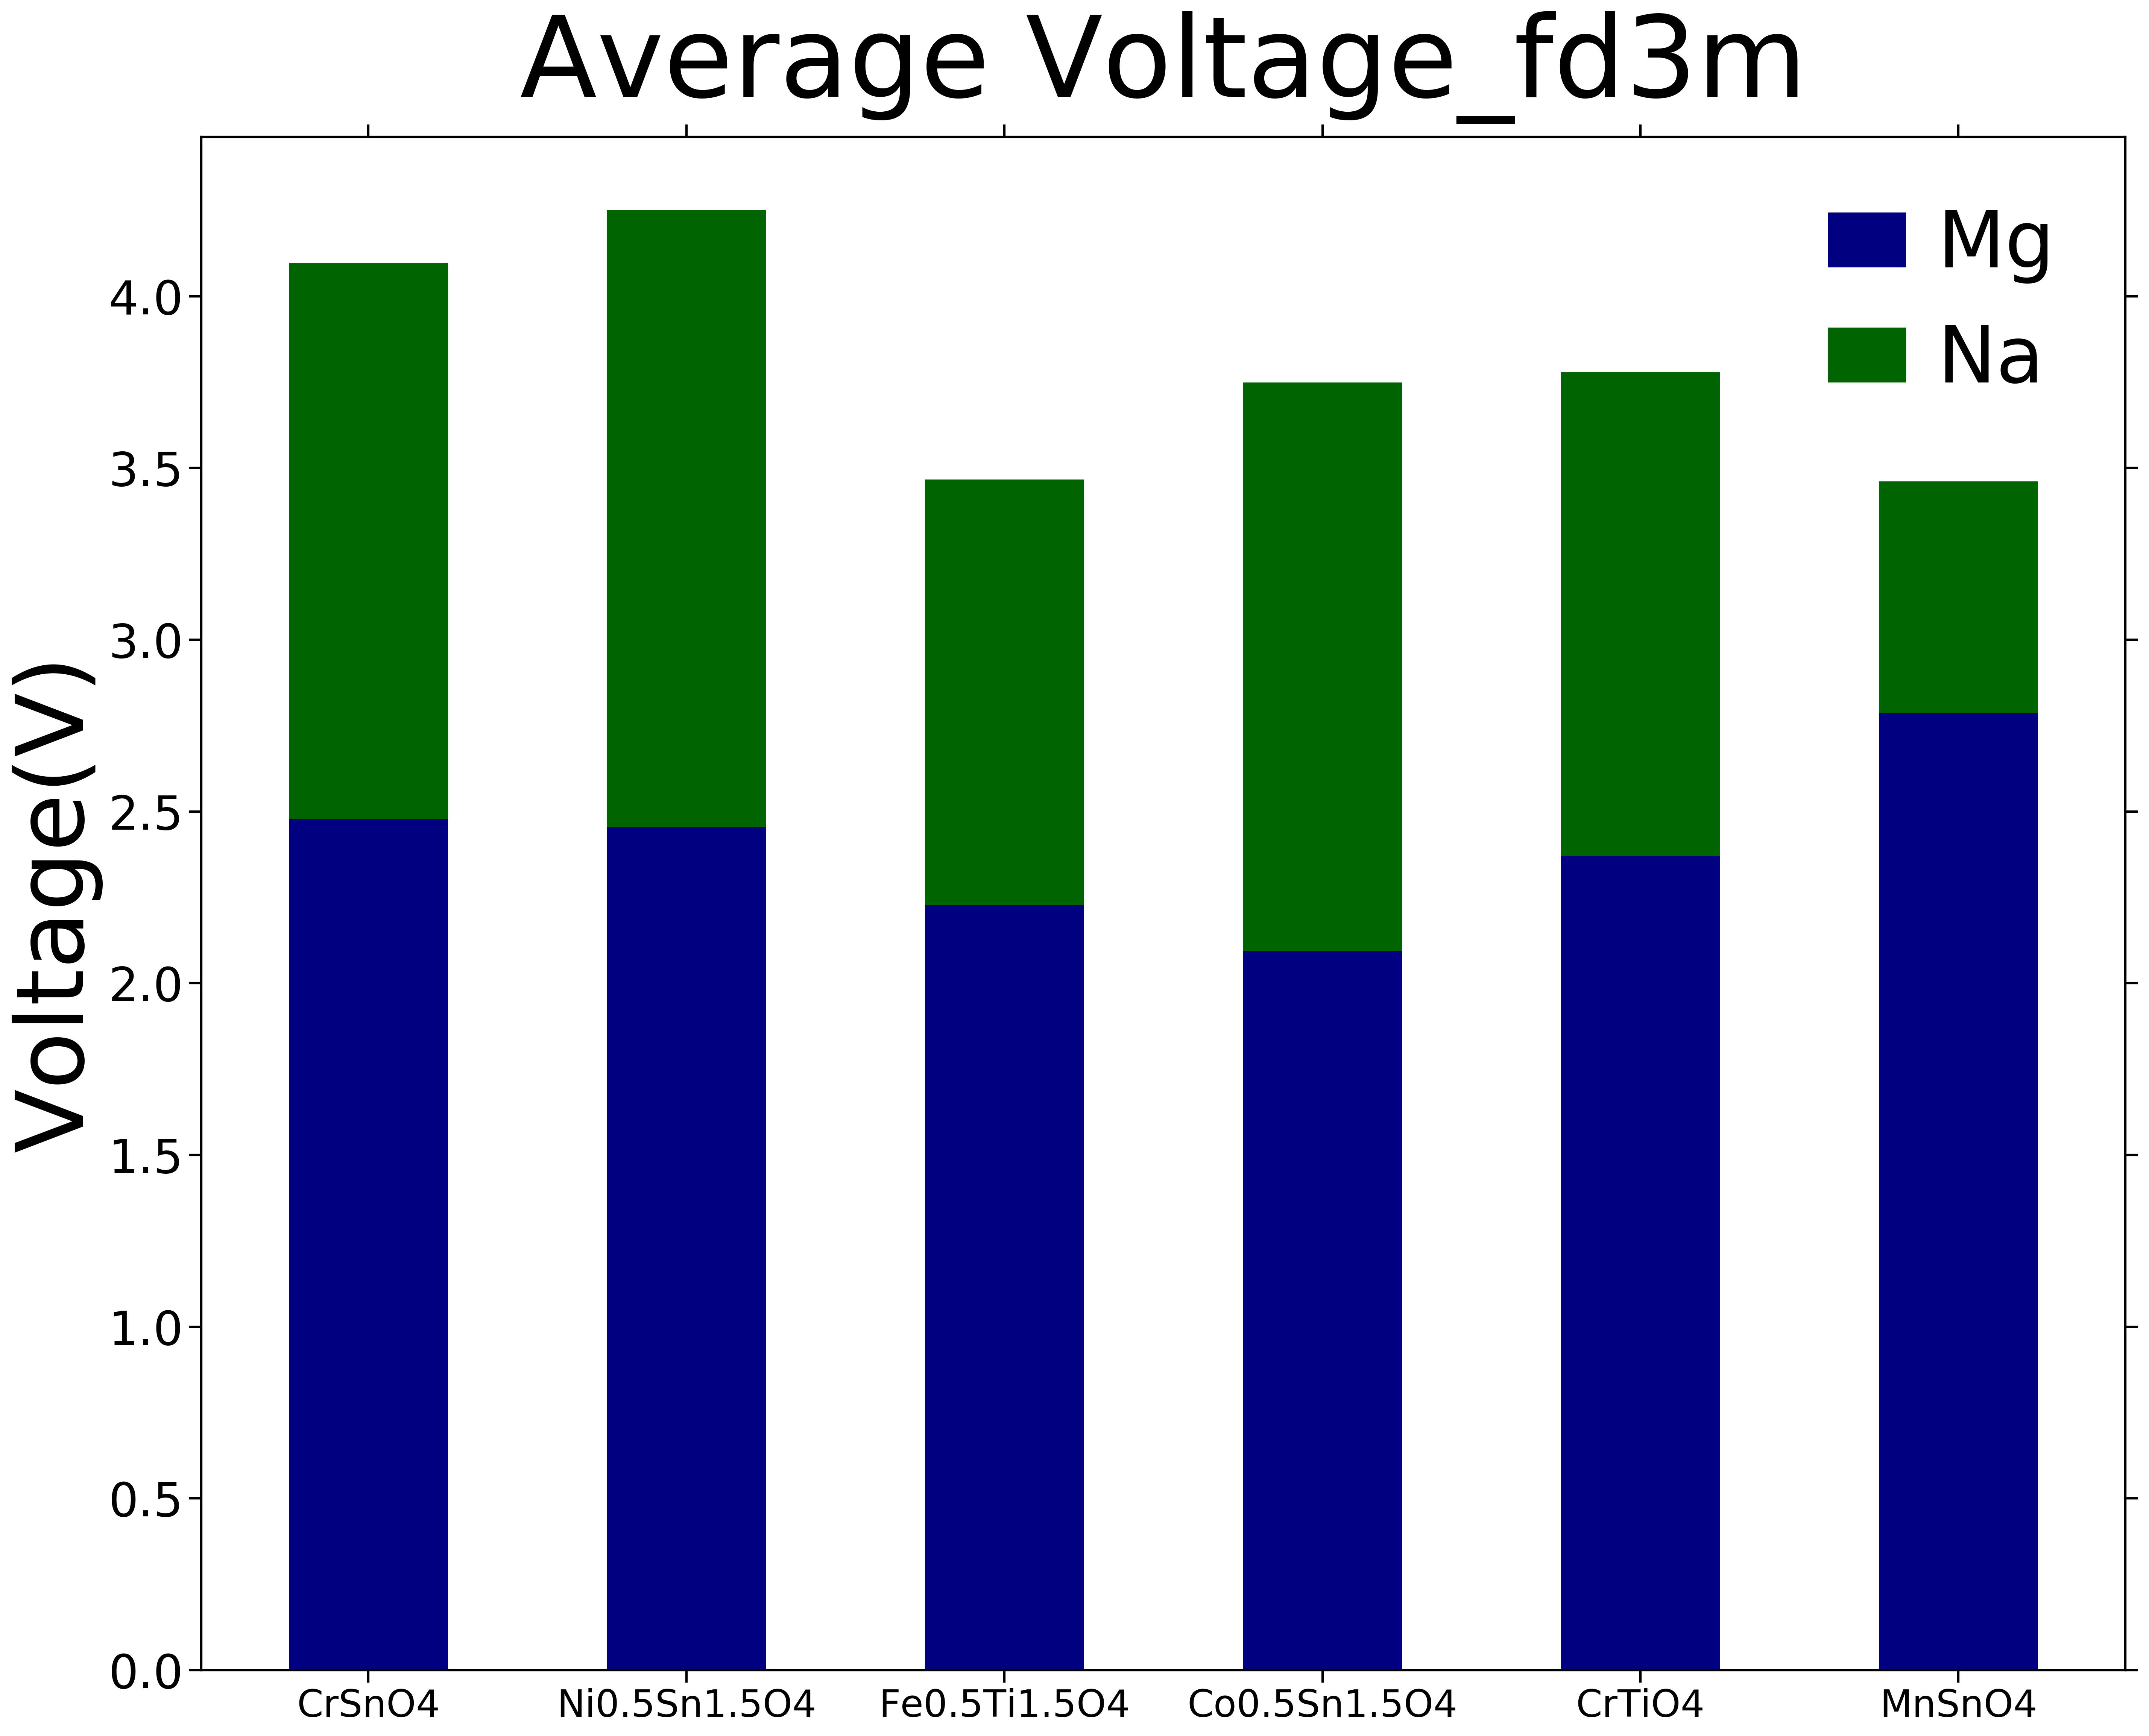

In [3]:
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/")
a.avplotter('fd3m', 'Mg', 'Na', calstructure = {'Co0.5Sn1.5O4': {'color': 'royalblue'}, 'CrSnO4': {'color': 'darkorange'}, 'CrTiO4': {'color': 'forestgreen'}, 
                                 'Fe0.5Ti1.5O4': {'color': 'dimgray'}, 'MnSnO4': {'color': 'firebrick'}, 'Ni0.5Sn1.5O4': {'color': 'darkorchid'}})

In [60]:
# Designate new calculation folder and take desire structure from MP database. Change supercell as you want.
a = VASPInputHandler.VASPSetUp("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/NaMnTiO4_pnma_first")
a.structure_from_mp("NaMn2O4", "Pnma", False, True)
a.make_supercell([2,1,1])

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/NaMnTiO4_pnma_first/POSCAR'

In [61]:
# Change atoms as you want and find most electrostatically stable structure.
a.change_atoms({'Na' : 'Na+', 'Mn' : {'Mn3+' : 0.5, 'Ti4+' : 0.5}, 'O' : 'O2-'}, 100)

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/NaMnTiO4_pnma_first/POSCAR'

In [58]:
# Change atoms one more time. Doing this twice is assuming rapid ion exchage in the process. And perturb poscar
a.change_atoms({'Na' : {'Na+' : 0.5}, 'Mn' : 'Mn3+', 'Ti' : 'Ti4+', 'O' : 'O2-'}, 100)
a.perturb_poscar(0.01)

'/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/Na0.5MnTiO4_pnma_first/POSCAR'

In [62]:
# Generate Kpoint density with 1000/atom, INCAR, POTCAR, script
a.kpoints(1000)
a.incar(geometry_opt=True, dos=True, MP=True, write_file=True)
a.potcar(MP=True, machine='cori')
a.copy_script(time='12:00:00')

In [18]:
a = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/CrTiO4/MgCrTiO4_pnma_first')
a.second_run()

In [7]:
b = VASPInputHandler.VASPBasicAnalysis('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second/')
b.ehullmp()

0.057252898333333135

In [5]:
import re
i = '/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4/MnTiO4_pnma_second'
re.findall('[A-Z][^A-Z]*', i.split('/')[-1].split('_')[0])[0]

'Mn'

In [5]:
b = VASPPlotter.Plotter('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/')

In [ ]:
b.ehullplotter('pnma', ionlist = ['Na', 'Mg'])

In [5]:
import os
import subprocess

In [ ]:
# For generating Secondrun file under MgPostSpinels dictionary
caldir = []
structurelist = [x[0] for x in os.walk('/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels')]
for path in structurelist:
    if path.split('/')[-2] == 'MgPostSpinels' and path.split('/')[-1][-1] == '4':
        caldir.append(path)
        
pathlist = []
for dirs in caldir:
    structurelist = [x[0] for x in os.walk(dirs)]
    for path in structurelist:
        if path.split('/')[-1].split('_')[-1] == 'first' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            a = VASPInputHandler.VASPBasicAnalysis(path)
            a.second_run()
            print(path)
        elif path.split('/')[-1].split('_')[-1] == 'second' and path.split('/')[-1].split('_')[-2] == 'fd3m':
            pathlist.append(path)

In [ ]:
for i, j in enumerate(pathlist):
    # subprocess.call(["ls -alt"], shell=True, cwd=j)
    subprocess.call(["sbatch script"], shell=True, cwd=j)  # for python 2
    print(j)
    print(str(i) + "th job is launched")

{'0': -383.59745, 'Na': {4: -402.29156, 8: -418.89604}, 'Mg': {4: -411.10806, 8: -431.97882}}


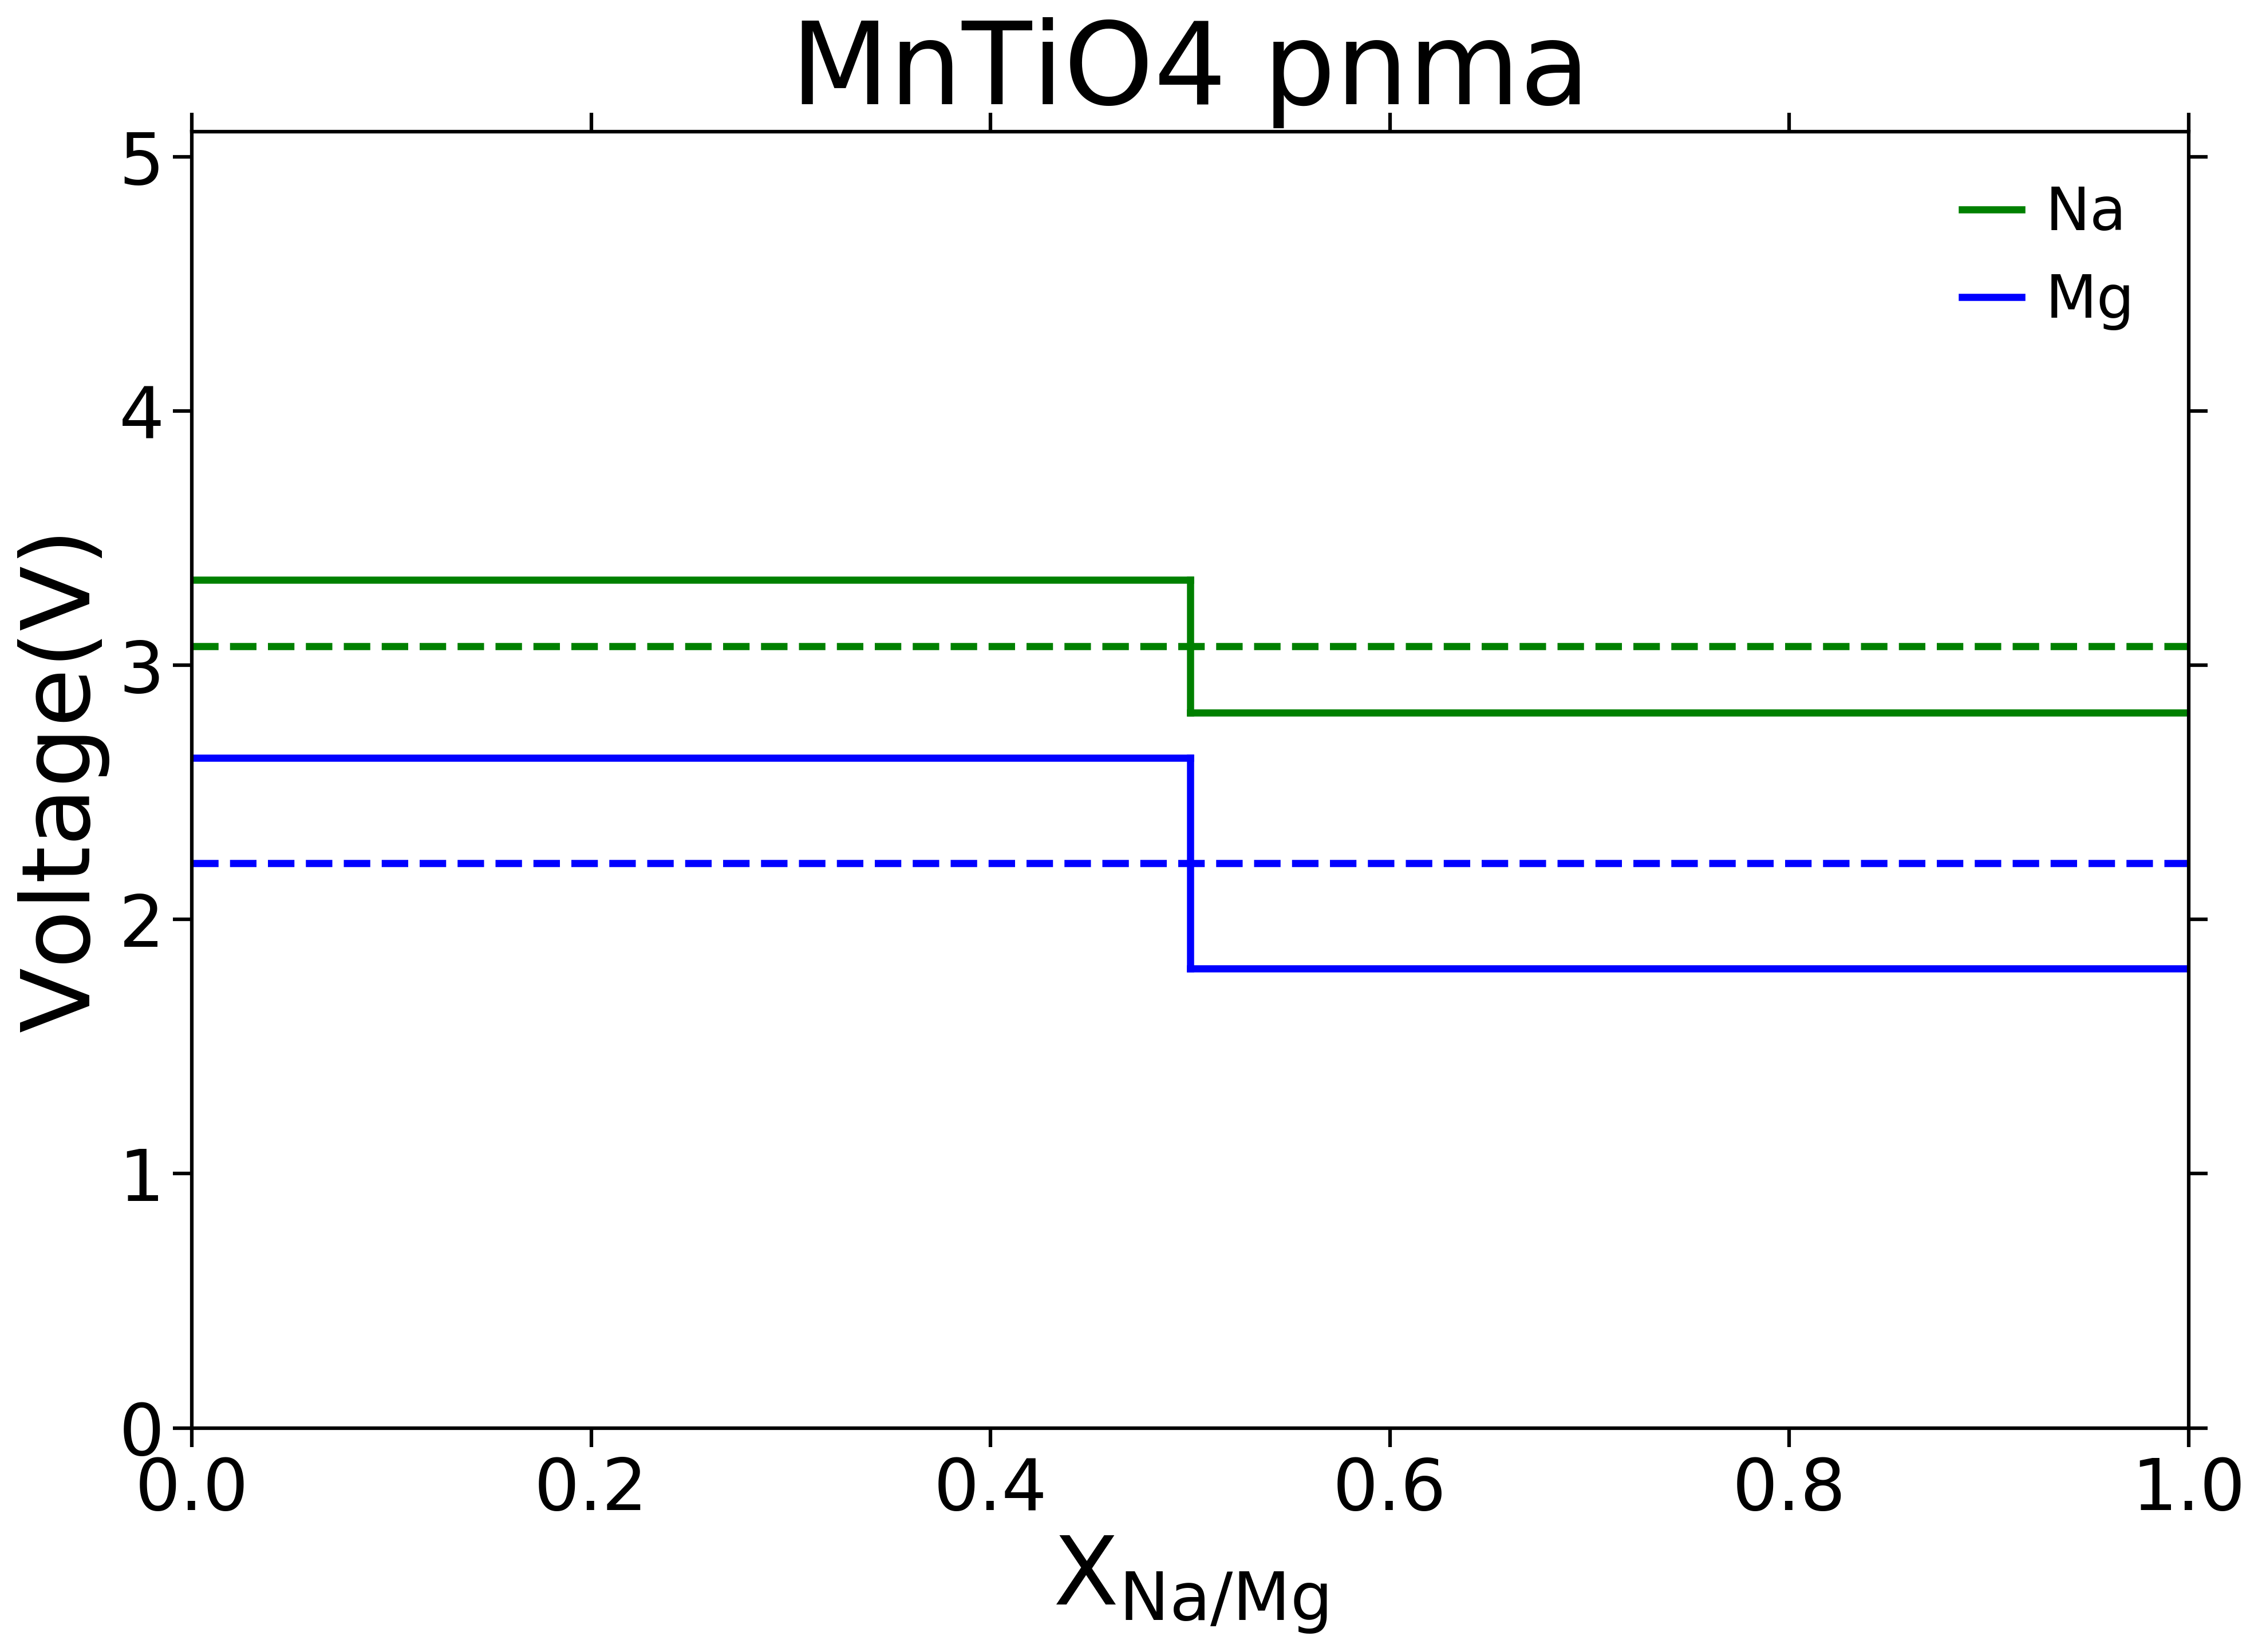

In [2]:
a = VASPPlotter.Plotter("/global/cscratch1/sd/yychoi/JCESR/MgPostSpinels/MnTiO4")
a.vcplotter('pnma')